<a href="https://colab.research.google.com/github/shilpiprd/shilpi_test/blob/master/Keras_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Keras_OCR

##Installation

In [1]:
!pip install -q keras-ocr

     |████████████████████████████████| 42 kB 391 kB/s 
     |████████████████████████████████| 965 kB 8.9 MB/s 
     |████████████████████████████████| 604 kB 11.3 MB/s 
     |████████████████████████████████| 9.5 MB 33.2 MB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 


##Importing Libraries


In [2]:
import keras_ocr
import matplotlib.pyplot as plt

##Download Weights

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


##Get Images

In [20]:
images = [
    keras_ocr.tools.read(img) for img in ['image2.jpeg',#name of this image can be changed.
                                          'image3.jpeg' ,
                                          'image4.jpeg'
    ]
]

In [21]:
len(images)

3

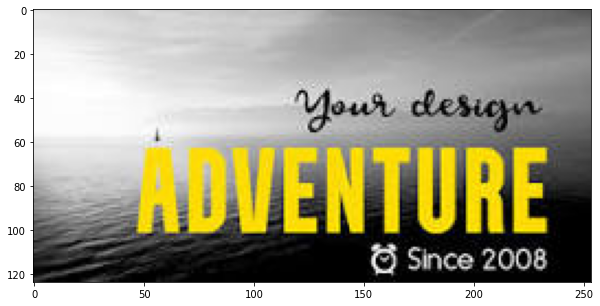

In [22]:
plt.figure(figsize = (10,20))
plt.imshow(images[0])

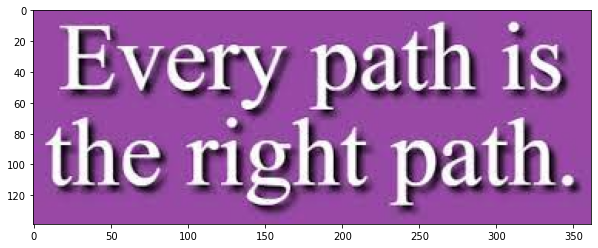

In [23]:
#plotting the images 
plt.figure(figsize = (10,20))
plt.imshow(images[1])

##Get Predictions

In [24]:
prediction_groups = pipeline.recognize(images)

7/7 [==============================] - 41s 6s/step


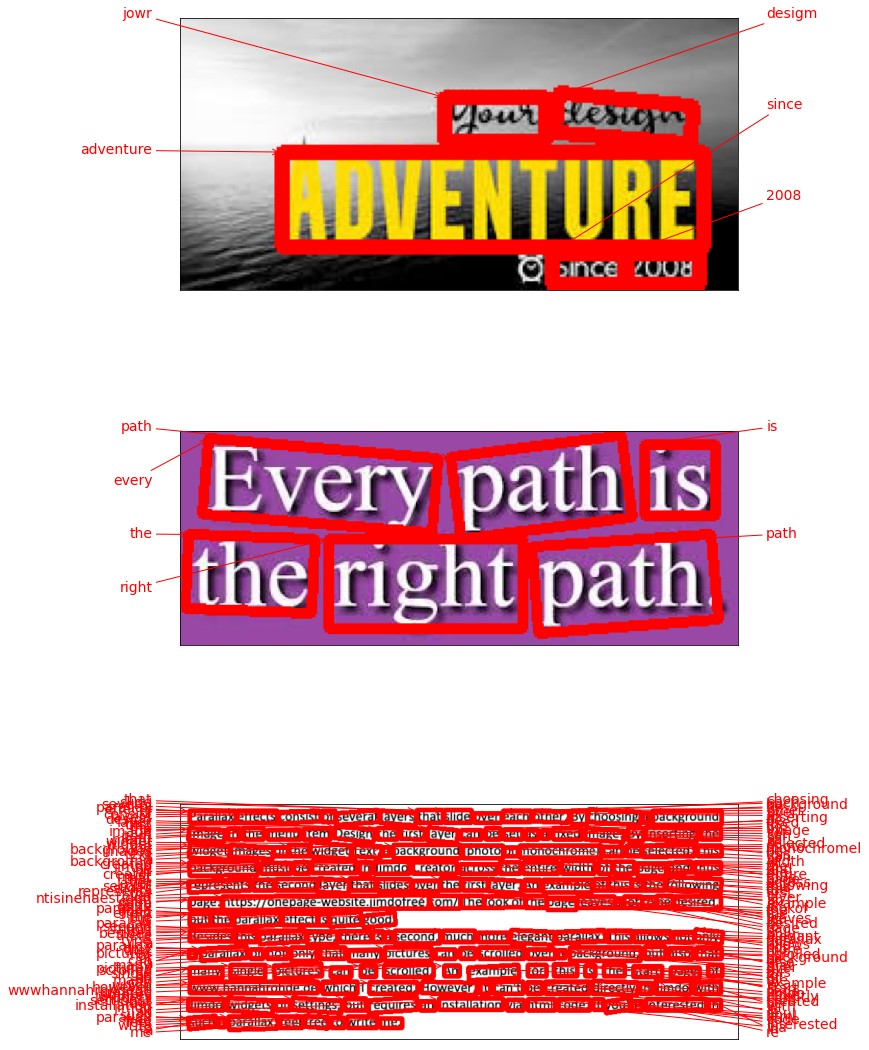

In [25]:
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)

##Trying to extract text from image 

In [65]:
predicted_image_1 = prediction_groups[2]
f = open('my_file', "w")
for text, box in predicted_image_1:
  print(text)
  f.write(text+"\t")
f.close()

parallax this is text
effects this is text
of this is text
several this is text
that this is text
slide this is text
each this is text
choosing this is text
background this is text
consist this is text
layers this is text
other this is text
by this is text
over this is text
a this is text
the this is text
the this is text
first this is text
layer this is text
be this is text
fixed this is text
the this is text
image this is text
in this is text
item this is text
design this is text
image this is text
by this is text
inserting this is text
set this is text
menu this is text
can this is text
as this is text
a this is text
widget this is text
the this is text
widget this is text
background this is text
selected this is text
images this is text
text this is text
photo this is text
monochromel this is text
be this is text
this this is text
can this is text
or this is text
a this is text
or this is text
background this is text
created this is text
jimdo this is text
width this is text
of thi

#Another Way of Implementing OCR

##Installing and Importing Libraries

In [ ]:
!pip install torch trochvision
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement trochvision (from versions: none)
ERROR: No matching distribution found for trochvision
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 145 kB 62.5 MB/s 
     |████████████████████████████████| 47.6 MB 1.8 MB/s 
     |████████████████████████████████| 604 kB 62.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
import easyocr 
import cv2 
from matplotlib import pyplot as plt 
import numpy as np 

##Read In Images

In [ ]:
IMAGE_PATH = 'image2.jpeg'

In [ ]:
reader = easyocr.Reader(['en'], gpu = False ) #try setting gpu = True
result = reader.readtext(IMAGE_PATH) 
result 

[([[120, 34], [168, 34], [168, 58], [120, 58]], 'Your', 0.24999801814556122),
 ([[40, 56], [244, 56], [244, 110], [40, 110]],
  'DVENTURE',
  0.9783791788731878),
 ([[153, 105], [237, 105], [237, 123], [153, 123]],
  '8 Since 2008',
  0.7940660281934325),
 ([[171.23076923076923, 32.15384615384615],
   [233.96355970118057, 39.61995618686828],
   [231.76923076923077, 59.84615384615385],
   [168.03644029881943, 52.38004381313172]],
  'desur~',
  0.22129278267049776)]

##Draw Results

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2]) 
text = result[0][1] 
font = cv2.FONT_HERSHEY_SIMPLEX 

In [ ]:
img = cv2.imread(IMAGE_PATH) 
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5) 
img = cv2.putText(img, text, top_left, font, .5, ()) 
plt.imshow(img)
plt.show()

##Handling Multiple Lines

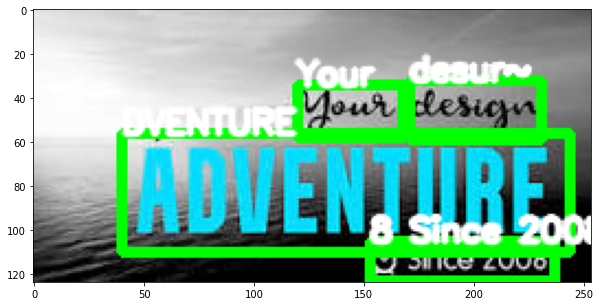

In [ ]:
img = cv2.imread(IMAGE_PATH) 
for detection in result: 
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]]) 
  text = detection[1] 
  font = cv2.FONT_HERSHEY_SIMPLEX 
  img = cv2.rectangle(img, top_left , bottom_right, (0,255,0), 3) 
  img = cv2.putText(img, text, top_left, font, .5, (255, 255, 257), 2, cv2.LINE_AA)#shows how big the text in white is. 

plt.figure(figsize = (10,10)) 
plt.imshow(img) 
plt.show()

In [ ]:
#location of a file which also implemnts ocr: 
#https://github.com/JiajunSong629/Quick_OCR_with_AWS_Lambda/blob/master/src/app.py